<a href="https://colab.research.google.com/github/jmorral/nyu-python-public-policy/blob/master/HW4_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Problem Statement: When comparing total 311 request counts per community district against the respective population, there seems to be a general trend that the higher the population, the higher the number of 311 requests. However, there is a lot of variance in the data. Maybe narrowing in on specific complaint type categories will help us better understand trends in 311 requests across the city.

"Noise" and "heat and hot water" were the most frequest requests in the entire 311 dataset. Let's try isolating the count of requests in each of those two categories versus all the other complaints.

**Q1:** First you will need to prep your data to get the count of complaints in each of the three categories. You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:

*   complaint_type = 'Noise - Residential'
*   complaint_type = 'HEAT/HOT WATER'
*   Everything else: (complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')









In [0]:
#Filtering by complaint_type
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [5]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

# note: we won't use count_all in the charts, but we can use it as a check that the subsets all add up to the correct total
count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
#thought I needed this. Didn't.
borocds_int = [int(i) for i in valid_borocds]


In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [9]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))


59
59
59
59


In [0]:
#Needed for Step 3
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')

In [0]:
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [12]:

merged_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')
merged_heatwater = pd.merge(left=count_heatwater, right=population, left_on='borocd', right_on='borocd')
merged_other = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')
merged_other.head()

,community_board,count_of_311_requests,borocd,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,01 BRONX,20316,201,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,01 BROOKLYN,59389,301,Brooklyn,1,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083
2,01 MANHATTAN,20261,101,Manhattan,1,"Battery Park City, Tribeca",7706,15918,25366,34420,60978
3,01 QUEENS,53370,401,Queens,1,"Astoria, Long Island City",185925,185198,188549,211220,191105
4,01 STATEN ISLAND,58449,501,Staten Island,1,"Stapleton, Port Richmond",135875,138489,137806,162609,175756


In [13]:
count_noise = merged_noise[['borocd', 'Borough', 'community_board', '2010 Population', 'count_of_311_requests']]
count_heatwater = merged_heatwater[['borocd', 'Borough', 'community_board', '2010 Population', 'count_of_311_requests']]
count_other = merged_other[['borocd', 'Borough', 'community_board', '2010 Population', 'count_of_311_requests']]
count_other.head()

,borocd,Borough,community_board,2010 Population,count_of_311_requests
0,201,Bronx,01 BRONX,91497,20316
1,301,Brooklyn,01 BROOKLYN,173083,59389
2,101,Manhattan,01 MANHATTAN,60978,20261
3,401,Queens,01 QUEENS,191105,53370
4,501,Staten Island,01 STATEN ISLAND,175756,58449


**Q2:** Create a stacked bar chart comprised of three stacked bars. The total height of each bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per CD.

*   number of 'Noise - Residential' complaints per CD
*   number of 'HEAT/HOT WATER' complaints per CD
*   number of other complaints per CD










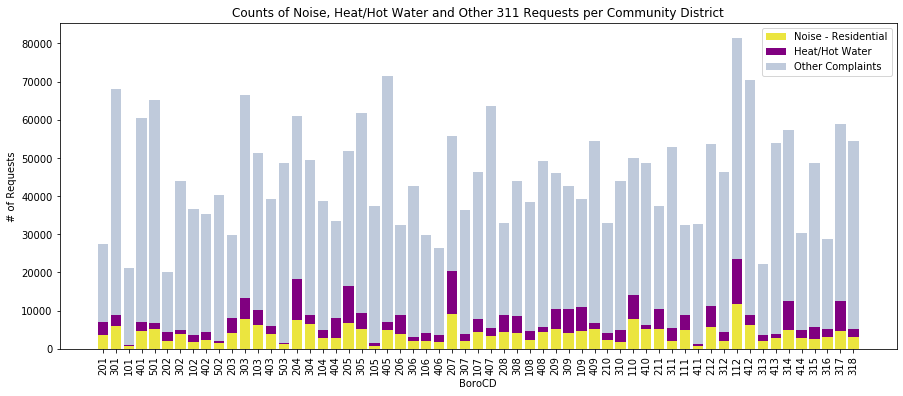

In [14]:
# X axis is still organized by CB data so this is the x axis
position_on_x = np.arange(len(count_all))

#Three pieces to the stack per CB
count_noise_np = np.array(count_noise.count_of_311_requests)

count_heatwater_np = np.array(count_heatwater.count_of_311_requests)

count_other_np = np.array(count_other.count_of_311_requests)

#resize plot
plt.figure(figsize=(15, 6))

#Plot recipe
plot1 = plt.bar(
  position_on_x,
  count_noise_np,
  align='center',
  color='#ebe53f',
  label='Noise - Residential'
)

plot2 = plt.bar(
  position_on_x,
  count_heatwater_np,
  bottom=count_noise_np,
  align='center',
  color='purple',
  label='Heat/Hot Water'
)

plot3 = plt.bar(
  position_on_x,
  count_other_np,
  bottom=count_heatwater_np+count_noise_np,
  align='center',
  color='#bfcadb',
  label='Other Complaints'
)

plt.xticks(position_on_x, count_all.borocd, rotation=90)

plt.title('Counts of Noise, Heat/Hot Water and Other 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() 

plt.show()


**Q3:** Create a scatter plot of community district's 311 counts per category (y-axis) vs. CD population (x-axis). The scatter plot should show each of the three complaint categories in a different color.

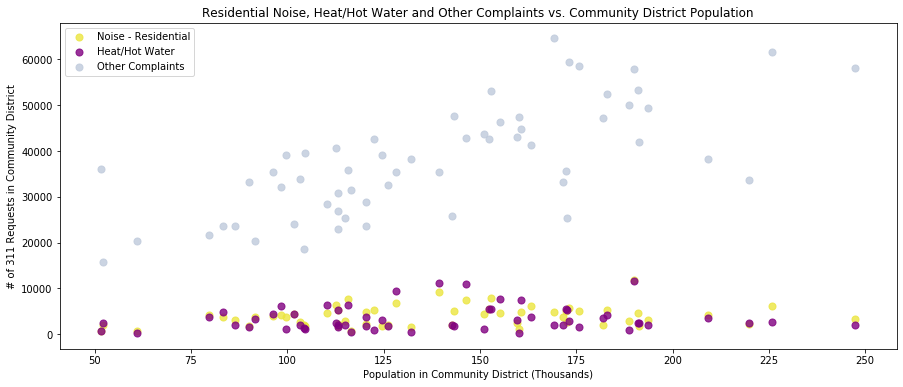

In [15]:
#need a list for each complaint type piece
noise_cds = [
  [count_noise['2010 Population']/1000],
  [count_noise.count_of_311_requests]
]

heatwater_cds = [
  [count_heatwater['2010 Population']/1000],
  [count_heatwater.count_of_311_requests]
]

other_cds = [
  [count_other['2010 Population']/1000],
  [count_other.count_of_311_requests]
]

colors = ["#ebe53f", "purple", "#bfcadb"]

groups = ["Noise - Residential", "Heat/Hot Water", "Other Complaints"]

#plot recipe
plt.figure(figsize=(15,6))

plt.scatter(
  noise_cds[0],
  noise_cds[1],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)

plt.scatter(
  heatwater_cds[0],
  heatwater_cds[1],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)

plt.scatter(
  other_cds[0],
  other_cds[1],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)

#Labels
plt.title('Residential Noise, Heat/Hot Water and Other Complaints vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

plt.legend(loc=2)

plt.show()